# ANÁLISIS DE DATOS
¿Qué es la libreria Pandas Datareader en Python?

Pandas Datareader es una librería de Python que nos permite generar DataFrames usando algunas de las páginas populares de fuentes de datos disponibles en internet, algunas de ellas son:
1. Yahoo finance
2. Google finance
3. Morningstar
4. IEX
5. Robinhood
...
Documentation: https://pandas-datareader.readthedocs.io/en/latest/index.html?adlt=strict&toWww=1&redig=4C01E77C943C48B58435FF424A6A714D

In [1]:
# LIBRERIAS
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt

from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
# VARIABLES
fuente = "yahoo"
fecha_I= "2017-10-10"
fecha_F= datetime.today().strftime('%Y-%m-%d')

In [3]:
# OBTENCIÓN DE LOS DATOS (DIARIOS)
# DIVISAS
btc_usd = web.DataReader('BTC-USD', data_source=fuente, start=fecha_I,end=fecha_F) # DOLAR

In [4]:
estandariza = StandardScaler()

## Variables a utilizar
-
### BTC a USD 
hTCd_BUSD = Muestra el valor máximo alcanzado en el día de BTC a USD

lTCd_BUSD = Muestra el valor mínimo alcanzado en el día de BTC a USD

oTCd_BUSD = Muestra el valor de apertura del día de BTC a USD

vTCd_BUSD = Muestra el volumen alcanzado en el día de BTC a USD

acTCd_BUSD = Muestra el precio de cierre ajustado (esto quiere decir un valor más preciso del precio de cierre) del día de BTC a USD

In [5]:
btc_usd.rename(columns={'High':'hTCd_BUSD',
                        'Low':'lTCd_BUSD',
                        'Open':'oTCd_BUSD',
                        'Close':'cTCd_BUSD',
                        'Volume':'vTCd_BUSD',
                        'Adj Close':'acTCd_BUSD'}, inplace=True)
btc_usd.to_csv('Datos_BTC.csv')

In [6]:
# Obtener cantidad de cambio diaria y porcentaje de cambio diario
# DIVISAS ---
# ---------------------------------------------------------------------------------------------------------
# BTC-USD
btc_usd = btc_usd.assign(dchange_BUSD=(btc_usd['oTCd_BUSD']-btc_usd['cTCd_BUSD']))
btc_usd = btc_usd.assign(pdcha_BUSD=(btc_usd['cTCd_BUSD']-btc_usd['oTCd_BUSD'])/(btc_usd['oTCd_BUSD']*100))

#### PORCENTAJE DE CAMBIO
#btc_usd['%-Chan'] = btc_usd['cTCd_BUSD'].pct_change()
#btc_usd['Log returns'] = np.log(btc_usd['Close']/btc_usd['Close'].shift())

#### MEDIAS MÓVILES SMA,EMA,CMA
# SMA - Media movil simple
#btc_usd['MM_SMA_20'] = btc_usd['acTCd_BUSD'].rolling(window=20).mean()
# EMA - Media móvil exponencial
#btc_usd['MM_EMA_20'] = btc_usd['acTCd_BUSD'].ewm(span=20).mean()
# CMA - Media móvil ponderada
#btc_usd['MM_CMA_20'] = btc_usd['acTCd_BUSD'].expanding(min_periods=20).mean()

### BANDAS DE BOLLINGER
#btc_usd['BB_dstd'] = btc_usd['acTCd_BUSD'].rolling(20).std()
#btc_usd['BB_med'] = btc_usd['acTCd_BUSD'].rolling(20).mean()
#btc_usd['BB_UP'] = btc_usd['BB_med']+2*btc_usd['BB_dstd']
#btc_usd['BB_DOWN'] = btc_usd['BB_med']-2*btc_usd['BB_dstd']

In [7]:
data  = btc_usd
dataF = data

# CORRELACIÓN
¿Para que sirve la correlación? La correlación es un tipo de asociación entre dos variables numéricas, específicamente evalúa la tendencia (creciente o decreciente) en los datos, es decir, expresa hasta que punto estan ligadas dos variables linealmente.
Sirve para describir relaciones. Por lo que en el siguiente apartado la columna acTCd_BUSD es la que vamos a considerar, y como podemos obtener tiene una correlación perfecta con la variable cTCd_BUSD (Correlación = 1).

In [8]:
# Obtenemos la correlación para determinar cuales variables son relevantes con respecto al precio de cierre y de apertura
correlacion = btc_usd.corr(method='pearson')
correlacion

,hTCd_BUSD,lTCd_BUSD,oTCd_BUSD,cTCd_BUSD,vTCd_BUSD,acTCd_BUSD,dchange_BUSD,pdcha_BUSD
hTCd_BUSD,1.000000,0.998600,0.999306,0.999232,0.587071,0.999232,0.009154,-0.013148
lTCd_BUSD,0.998600,1.000000,0.998702,0.999101,0.568488,0.999101,0.001155,-0.009023
oTCd_BUSD,0.999306,0.998702,1.000000,0.998253,0.581157,0.998253,0.037451,-0.035952
cTCd_BUSD,0.999232,0.999101,0.998253,1.000000,0.579144,1.000000,-0.021656,0.009596
vTCd_BUSD,0.587071,0.568488,0.581157,0.579144,1.000000,0.579144,0.038650,-0.004213
acTCd_BUSD,0.999232,0.999101,0.998253,1.000000,0.579144,1.000000,-0.021656,0.009596
dchange_BUSD,0.009154,0.001155,0.037451,-0.021656,0.038650,-0.021656,1.000000,-0.770659
pdcha_BUSD,-0.013148,-0.009023,-0.035952,0.009596,-0.004213,0.009596,-0.770659,1.000000


Conjunto de datos de entrenamiento
Amazon Inc. (2004-2015)
Cantidad de usuarios de Internet (2000-2012)
Oro (Historico: Ajustar los valores al más óptimo)

BTC-EUR (Historico: diario, semanal y mensual)
BTC-YEN (Historico: diario, semanal y mensual)
BTC-USD (Historico: diario, semanal y mensual)

# CONJUNTO DE PRUEBA FINAL - BITCOIN-USD

In [9]:
# Obtenemos el numero de filas y columnas con la que vamos a trabajar
data.shape
data = data.filter(['acTCd_BUSD'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * (0.75)) #math ceil permitira redondear hacia arriba el valor y trabajar numeros enteros
training_data_len #Imprimimos el valor
# Ahora escalamos los datos para trabajarlos entre 0 y 1 y de esta manera clasificar de mejor manera
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60, len(train_data)): 
    x_train.append(train_data[i-60:i, 0]) 
    y_train.append(train_data[i,0])
    if i<=61: 
        print(x_train)
        print(y_train)
        print()
        
# Una vez obtenidos los valores para x_train y_train, convertamos estos en arreglos para trabajarlos.
x_train, y_train = np.array(x_train), np.array(y_train)
# Ahora que tenemos los datos como los queremos, tenemos que remodelarlos ya que el modelo lstm, trabaja sobre 
# Esquemas tridimensionales donde es necesario que los datos se acoplen, por lo cual es necesario este paso.
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape
#Ahora nos pasaremos a contruir el modelo LSTM
model = Sequential() 
model.add(LSTM(50, return_sequences = True , input_shape=(60, 1)))
model.add(LSTM(50, return_sequences = False)) 
model.add(Dense(25))
model.add(Dense(1))
#Compilacion del modelo creado
model.compile(optimizer='adam',loss='mean_squared_error')
#Ahora entrenaremos al modelo utilizando ajustes de los parametros
model.fit(x_train,y_train,batch_size=1,epochs=1)

[array([0.02402032, 0.0247119 , 0.03435638, 0.03747001, 0.04033928,
       0.03795159, 0.03868841, 0.03682179, 0.03659142, 0.03842306,
       0.04313206, 0.04344529, 0.04308496, 0.04187091, 0.03559577,
       0.0390803 , 0.04147467, 0.0395482 , 0.0391159 , 0.04534565,
       0.04498314, 0.05023527, 0.05488178, 0.05971917, 0.06172849,
       0.06440516, 0.06483202, 0.0588527 , 0.06074326, 0.0656447 ,
       0.06073083, 0.05256296, 0.0485129 , 0.04217792, 0.05165125,
       0.0528367 , 0.06340392, 0.07204918, 0.06952004, 0.07078165,
       0.07461097, 0.07716264, 0.07515145, 0.07798512, 0.07464641,
       0.07798731, 0.08633845, 0.0947269 , 0.10230967, 0.10604743,
       0.10340186, 0.10876466, 0.12029893, 0.12183786, 0.12570232,
       0.13089429, 0.13492818, 0.17184404, 0.22793288, 0.20725361])]
[0.1856276410652411]

[array([0.02402032, 0.0247119 , 0.03435638, 0.03747001, 0.04033928,
       0.03795159, 0.03868841, 0.03682179, 0.03659142, 0.03842306,
       0.04313206, 0.04344529, 0.043

In [10]:
#Una vez entrenado el modelo procedemos a crear un conjunto de datos con el cual trabajar
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    
#Ahora convertimos el conjunto de datos en un arreglo para que sea mas manejable al momento de utilizarlo
x_test = np.array(x_test)
#Despues lo remodelamos ya que como se menciono con anterioridad el modelo LSTM solo trabaja con datos de caracter dimensional
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#Ahora con los ajustes necesarios hechos, procedemos a usar la funcion de prediccion para poder trabajar con el modelo
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
#Ahora obtendremos el error cuadrado medio con el cual podemos trabajar
rmse = np.sqrt(np.mean(predictions - y_test)**2)
#Ahora imprimimos los datos de manera que podamos verlo de forma historica con la funcion plot
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions #Agregamos una nueva columna llamada predictions que isara los datos que hicimos anteriormente
# PORCENTAJE DE ERROR
evalu = valid
evalu['Error'] = (evalu['Predictions']-evalu['acTCd_BUSD'])/(evalu['acTCd_BUSD'])*100
# DIFERENCIA DE LA PREDICCION Y EL VALOR REAL
evalu['Diferencia'] = evalu['Predictions']-evalu['acTCd_BUSD']
# PROMEDIO DE ERROR TOTAL
evalu['Error'].mean()

C:\Users\braya\AppData\Local\Temp\ipykernel_19320\2832310474.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions #Agregamos una nueva columna llamada predictions que isara los datos que hicimos anteriormente
C:\Users\braya\AppData\Local\Temp\ipykernel_19320\2832310474.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evalu['Error'] = (evalu['Predictions']-evalu['acTCd_BUSD'])/(evalu['acTCd_BUSD'])*100
C:\Users\braya\AppData\Local\Temp\ipykernel_19320\2832310474.py:25: 

-3.599764609864915

# GRÁFICAS

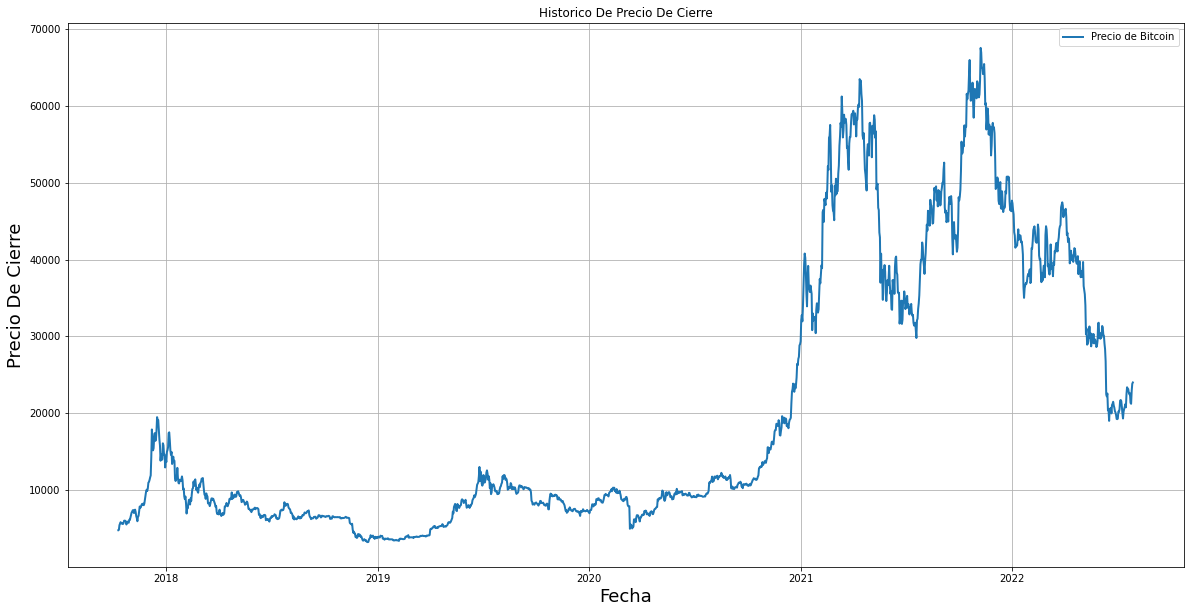

In [11]:
plt.figure(figsize=(20,10))
plt.grid(True)
plt.title('Historico De Precio De Cierre')
plt.plot(data['acTCd_BUSD'], label='Precio de Bitcoin', lw='2.0')
plt.xlabel('Fecha',fontsize=18)
plt.ylabel('Precio De Cierre', fontsize=18)
plt.legend()
plt.show()

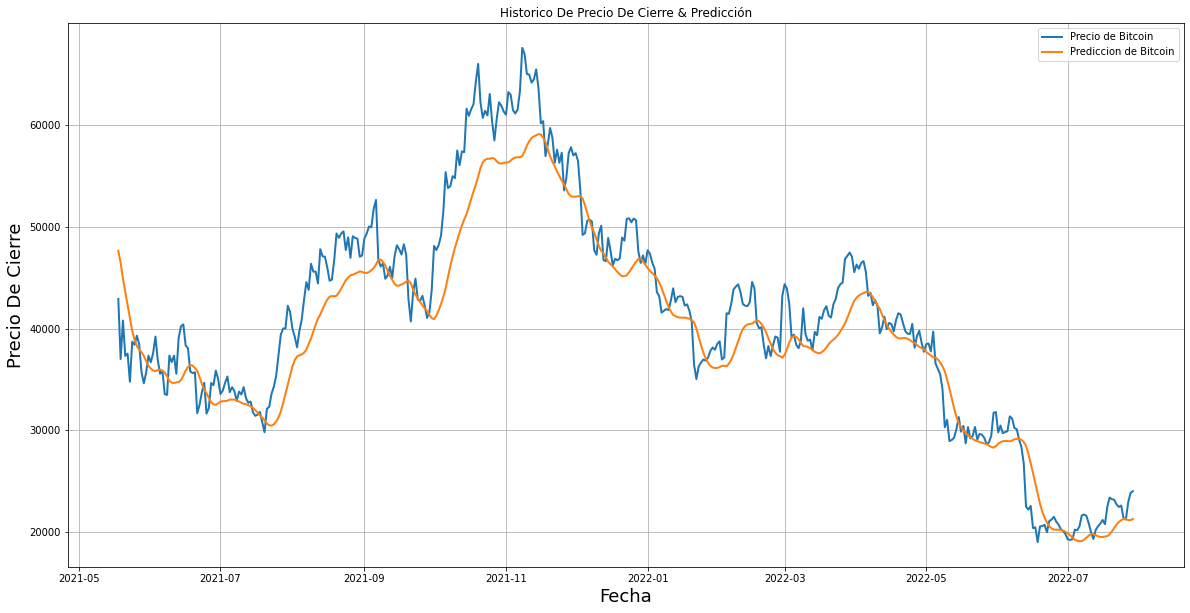

In [12]:
plt.figure(figsize=(20,10))
plt.grid(True)
plt.title('Historico De Precio De Cierre & Predicción')
plt.plot(evalu['acTCd_BUSD'], label='Precio de Bitcoin', lw='2.0')
plt.plot(evalu['Predictions'], label='Prediccion de Bitcoin', lw='2.0')
plt.xlabel('Fecha',fontsize=18)
plt.ylabel('Precio De Cierre', fontsize=18)
plt.legend()
plt.show()

# CONJUNTO DE APLICACION (BTC-FINAL )

In [13]:
#Creamos un nuevo conjunto de datos
new_df = dataF.filter(['acTCd_BUSD'])
#Obtenemos los valores de cierre de los ultimos 60 dias (se puede modificar)
last_60_days = new_df[-60:].values
#Escalamos los datos para trabajar mas facilmente con ellos
last_60_days_scaled = scaler.transform(last_60_days)
#Creamos un conjunto vacio para almacenar datos
X_test = []
#Agregamos los valores de los ultimos 60 dias
X_test.append(last_60_days_scaled)
#Convertimos el conjunto en un arreglo para pasarlo al modelo
X_test = np.array(X_test)
#Remodelamos los datos para pasarlo al modelo
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Obtenemos el valor de prediccion
pred_price = model.predict(X_test)


In [14]:
#Escalamos los datos nuevamente
print('La predicción del cierre mañana es: ') #Imprimimos
pred_price = scaler.inverse_transform(pred_price)
pred_price

La predicción del cierre mañana es: 


array([[21489.54]], dtype=float32)

In [15]:
# Exportar datos a Excel
evalu.to_csv('AdjClose.csv')